In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/My Drive/Code/hotel_bookings.csv"
df = pd.read_csv(file_path)


In [4]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
# Select a sample of 20,000 rows
df_sample = df.sample(n=20000, random_state=42)

# Display sample information
print(df_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 30946 to 92398
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20000 non-null  object 
 1   is_canceled                     20000 non-null  int64  
 2   lead_time                       20000 non-null  int64  
 3   arrival_date_year               20000 non-null  int64  
 4   arrival_date_month              20000 non-null  object 
 5   arrival_date_week_number        20000 non-null  int64  
 6   arrival_date_day_of_month       20000 non-null  int64  
 7   stays_in_weekend_nights         20000 non-null  int64  
 8   stays_in_week_nights            20000 non-null  int64  
 9   adults                          20000 non-null  int64  
 10  children                        20000 non-null  float64
 11  babies                          20000 non-null  int64  
 12  meal                            2

In [7]:
# Print the shape of the sampled dataset
print("Sampled Data Shape:", df_sample.shape)


Sampled Data Shape: (20000, 32)


In [8]:
df_sample.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,17225.000000,1155.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.376900,104.676050,2016.158800,27.140950,15.855900,0.933650,2.503350,1.858000,0.104550,0.007650,0.033000,0.08805,0.154100,0.220650,86.786531,186.619048,2.281300,101.535115,0.060250,0.570550
std,0.484622,106.944533,0.708172,13.642382,8.782812,0.994785,1.899571,0.628694,0.400159,0.107666,0.178641,0.82288,1.570789,0.647445,110.535579,130.274355,17.448965,47.748787,0.239213,0.798533
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,67.000000,0.000000,68.445000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,174.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,229.000000,263.500000,0.000000,125.400000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.00000,63.000000,17.000000,531.000000,525.000000,391.000000,451.500000,3.000000,5.000000


In [9]:

duplicate_count = df_sample.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 3244


In [10]:
# Check again for missing values
print(df_sample.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             103
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2775
company                           18845


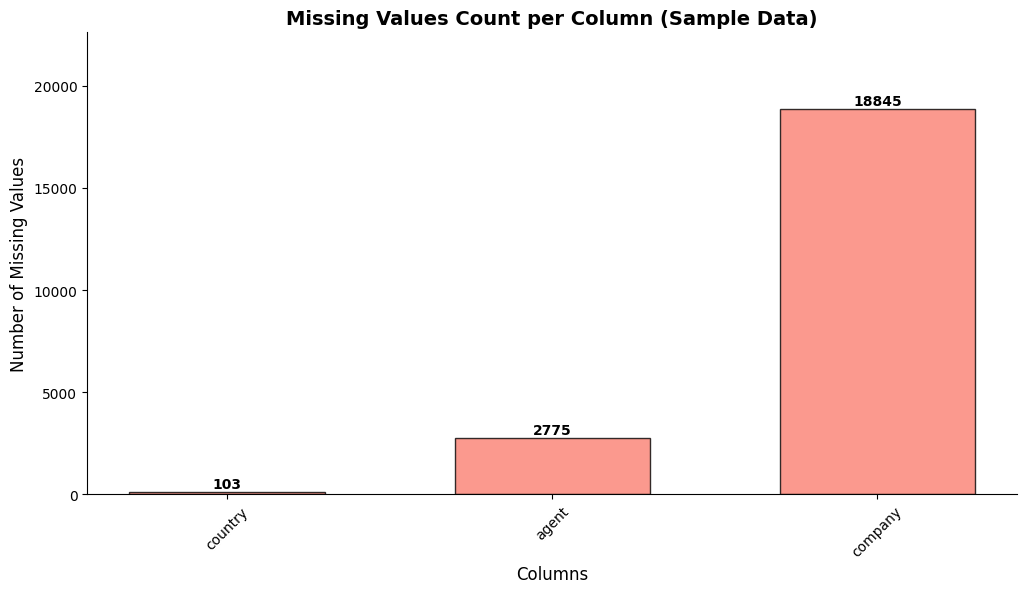

In [11]:

# Count the number of missing values in each column for the sample data
missing_values_sample = df_sample.isnull().sum()

# Keep only columns that have missing values
missing_values_sample = missing_values_sample[missing_values_sample > 0]

# If no missing values, print message and exit
if missing_values_sample.empty:
    print("No missing values in the sampled dataset.")
else:
    # Set figure size and style
    plt.figure(figsize=(12, 6))

    # Create a bar chart with enhanced visuals
    bars = plt.bar(
        missing_values_sample.index,
        missing_values_sample.values,
        color="salmon",
        edgecolor="black",
        width=0.6,
        alpha=0.8,
    )

    # Adjust the y-axis limit for a better view
    max_missing = missing_values_sample.max()
    plt.ylim(0, max_missing * 1.2)

    # Add numerical labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max_missing * 0.01, # Changed to add a small value for spacing
            f"{int(height)}",  # Changed this line to only include the height as a string
            ha="center",
            fontsize=10,
            fontweight="bold",
            color="black",
        )

    # Add title and labels with better formatting
    plt.title("Missing Values Count per Column (Sample Data)", fontsize=14, fontweight="bold")
    plt.xlabel("Columns", fontsize=12)
    plt.ylabel("Number of Missing Values", fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)


    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    # Show the plot
    plt.show()

Handle missing values

In [12]:
# Fill missing values in 'children' with 0 (assuming no children)
df_sample['children'].fillna(0, inplace=True)

# Fill missing 'country' with the most frequent value (mode)
df_sample['country'].fillna(df['country'].mode()[0], inplace=True)

# Fill 'agent' with a special category (e.g., 0 means "unknown agent")
df_sample['agent'].fillna(0, inplace=True)

<ipython-input-12-2a7eedad3e00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample['children'].fillna(0, inplace=True)
<ipython-input-12-2a7eedad3e00>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [13]:
df_sample.drop(columns=['company'], inplace=True)


In [14]:
df_sample.dropna(subset=['country'], inplace=True)


In [15]:
print(df_sample.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [16]:
df_sample_cleaned = df_sample
# Identify categorical columns
categorical_cols = df_sample_cleaned.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_sample_cleaned[col] = le.fit_transform(df_sample_cleaned[col])
    label_encoders[col] = le

# Display updated dataset
print(df_sample_cleaned.head())


        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
30946       1            0        203               2016                   2   
40207       0            1         82               2015                   5   
103708      0            0         25               2016                   2   
85144       0            0          1               2016                   7   
109991      0            0         70               2017                   0   

        arrival_date_week_number  arrival_date_day_of_month  \
30946                         49                          2   
40207                         29                         16   
103708                        53                         27   
85144                         11                          9   
109991                        16                         16   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
30946                         2                     5       2  ...   


DETECT OUTLIERS

In [17]:
import numpy as np

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper limit for outliers

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Total Outliers in '{col}': {len(outliers)}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    return outliers

# Detect outliers in 'adr' column
outliers_adr = detect_outliers(df_sample, 'adr')

# Display first few outliers
outliers_adr.head()


Total Outliers in 'adr': 618
Lower Bound: -16.99, Upper Bound: 210.83


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13370,1,1,46,2017,1,32,12,2,5,2,...,0,0,261.0,0,2,212.00,0,0,0,815
7336,1,1,23,2016,1,32,4,0,3,2,...,0,0,242.0,0,2,272.70,0,0,0,468
38800,1,0,149,2017,5,30,26,0,4,2,...,0,0,250.0,0,2,211.25,0,0,1,833
12786,1,1,21,2017,5,29,17,1,3,2,...,0,0,240.0,0,2,230.00,0,1,0,802
12800,1,1,190,2017,5,29,17,2,5,3,...,3,0,250.0,0,2,274.45,0,0,0,806


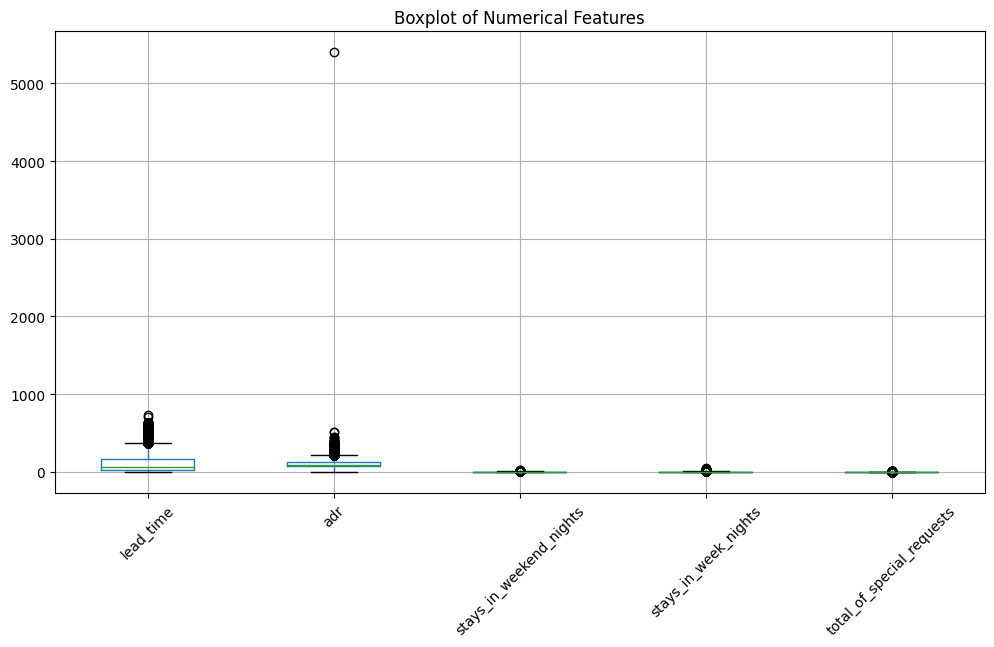

In [18]:

# List of numerical columns to check for outliers
num_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

# Plot boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


In [19]:
# Compute Z-scores
z_scores = np.abs(stats.zscore(df[[ 'adr']]))
outliers = (z_scores > 3).sum(axis=0)

print("Outliers detected per column:")
print(outliers)


Outliers detected per column:
adr    1138
dtype: int64


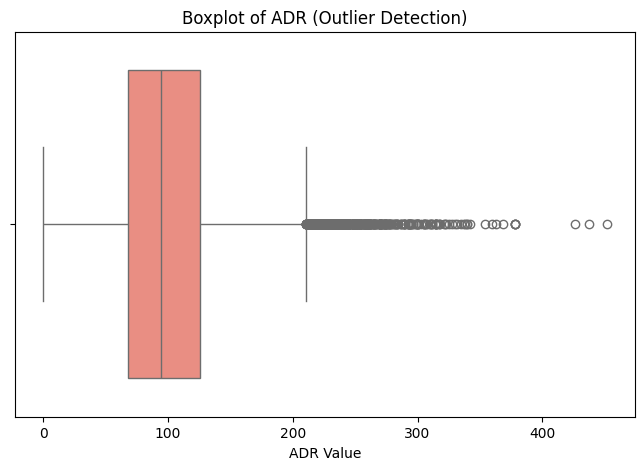

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_sample["adr"], color="salmon")

plt.title("Boxplot of ADR (Outlier Detection)")
plt.xlabel("ADR Value")
plt.show()


In [21]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that contain outliers
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"Original rows: {len(df)}, After removing outliers: {len(df_filtered)}")

    return df_filtered

# Removing outliers from ADR column
df_sample_cleaned = remove_outliers(df_sample, 'adr')

# Display first few rows of cleaned data
#df_sample_cleaned.head()


Original rows: 20000, After removing outliers: 19382


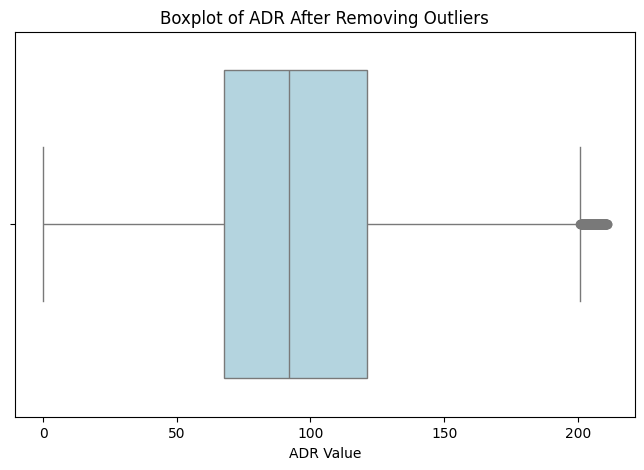

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_sample_cleaned["adr"], color="lightblue")

plt.title("Boxplot of ADR After Removing Outliers")
plt.xlabel("ADR Value")
plt.show()


EDA

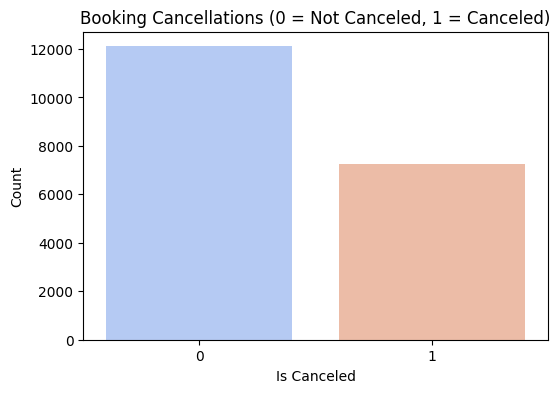

Cancellation Rate: 37.52%


In [23]:
# Countplot for cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x="is_canceled", hue="is_canceled", data=df_sample_cleaned, palette="coolwarm", legend=False)

plt.title("Booking Cancellations (0 = Not Canceled, 1 = Canceled)")
plt.xlabel("Is Canceled")
plt.ylabel("Count")
plt.show()


# Calculate cancellation rate
cancellation_rate = df_sample_cleaned["is_canceled"].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


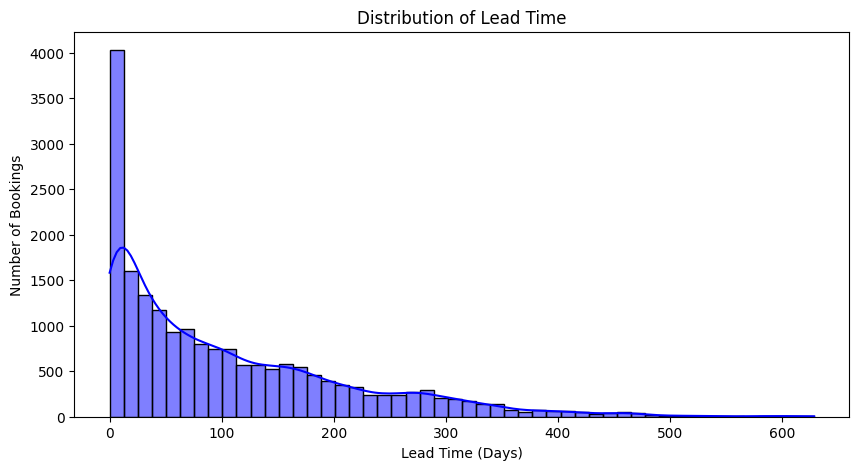

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df_sample_cleaned['lead_time'], bins=50, kde=True, color='blue')
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.show()


<ipython-input-25-969ac641bf4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_cleaned['deposit_type'] = df_sample_cleaned['deposit_type'].map(deposit_mapping)


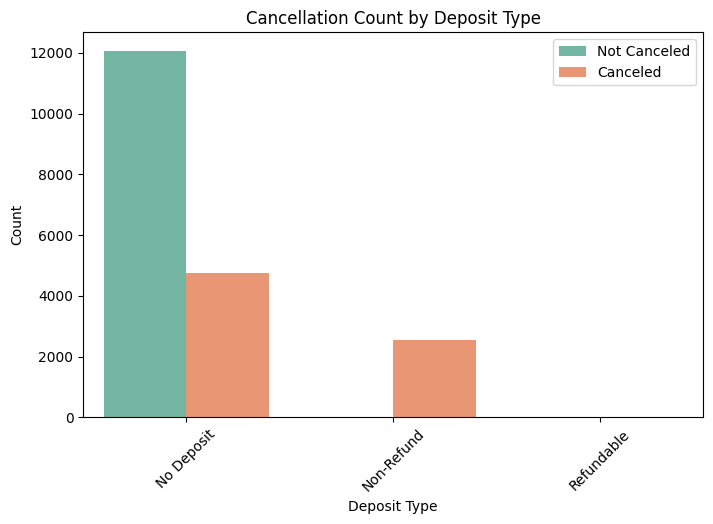

In [25]:
# Example mapping (modify based on your actual encoding)
deposit_mapping = {0: "No Deposit", 1: "Non-Refund", 2: "Refundable"}

# Apply mapping to the deposit_type column
df_sample_cleaned['deposit_type'] = df_sample_cleaned['deposit_type'].map(deposit_mapping)

# Now plot the countplot
plt.figure(figsize=(8,5))
sns.countplot(x=df_sample_cleaned['deposit_type'], hue=df_sample_cleaned['is_canceled'], palette='Set2')
plt.title("Cancellation Count by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=45)
plt.show()


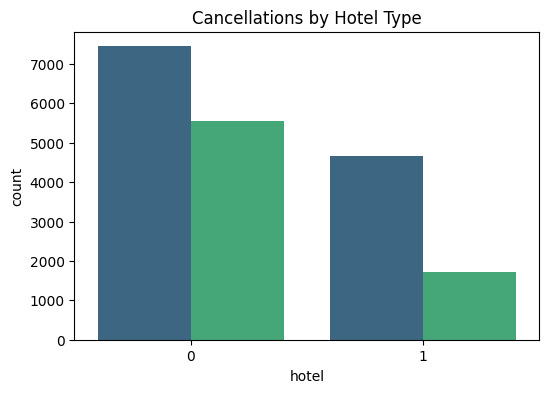

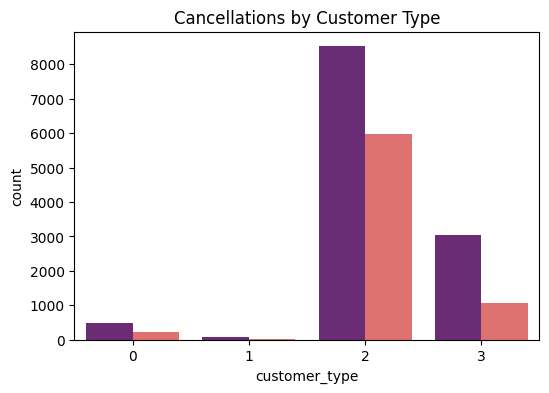

In [26]:
# Cancellation by hotel type
plt.figure(figsize=(6, 4))
sns.countplot(x="hotel", hue="is_canceled", data=df_sample_cleaned, palette="viridis",legend=False)
plt.title("Cancellations by Hotel Type")
plt.show()

# Cancellation by customer type
plt.figure(figsize=(6, 4))
sns.countplot(x="customer_type", hue="is_canceled", data=df_sample_cleaned, palette="magma",legend=False)
plt.title("Cancellations by Customer Type")
plt.show()



<ipython-input-27-5380b78f0b57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_cleaned["market_segment"] = df_sample_cleaned["market_segment"].replace(segment_mapping)


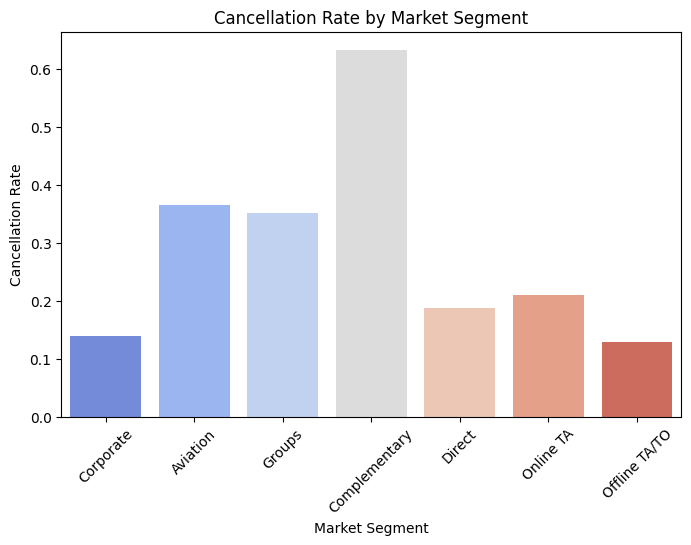

In [27]:
# Map numerical values back to original segment names
segment_mapping = {
    0: "Online TA", 1: "Offline TA/TO", 2: "Direct",
    3: "Corporate", 4: "Complementary", 5: "Groups",
    6: "Aviation"
}

df_sample_cleaned["market_segment"] = df_sample_cleaned["market_segment"].replace(segment_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(x="market_segment", y="is_canceled", hue="market_segment",
            data=df_sample_cleaned, palette="coolwarm", errorbar=None, legend=False)
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()



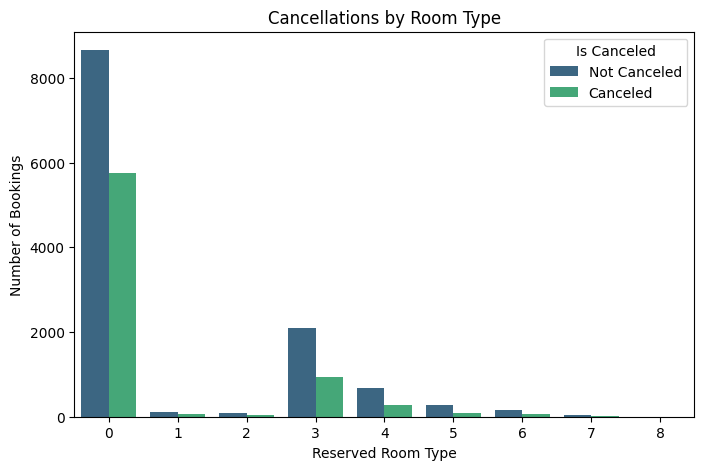

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x="reserved_room_type", hue="is_canceled", data=df_sample_cleaned, palette="viridis")
plt.title("Cancellations by Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Bookings")
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.show()


Install Surprise package

In [29]:
#pip install scikit-surprise


In [33]:
#if df_sample_cleaned['market_segment'].dtype == 'object':
    # If it's an object type, apply Label Encoding
#    le = LabelEncoder()
 #   df_sample_cleaned['market_segment'] = le.fit_transform(df_sample_cleaned['market_segment'])

# Convert 'deposit_type' and other relevant categorical columns back to numerical using Label Encoding
for col in ['deposit_type']: # Replace 'other_categorical_columns_if_any' with actual column names if needed
    if df_sample_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        df_sample_cleaned[col] = le.fit_transform(df_sample_cleaned[col])

X = df_sample_cleaned.drop(columns=['is_canceled'])  # Features (all columns except the target)
y = df_sample_cleaned['is_canceled']  # Target variable

X = pd.get_dummies(X, drop_first=True)  # This creates dummy variables

# Get a list of numerical features
numerical_features = X.select_dtypes(include=['number']).columns

# Scale only numerical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (15505, 35) (15505,)
Testing data shape: (3877, 35) (3877,)


SVM METHOD:

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.9953572349754966
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2397
           1       1.00      0.99      0.99      1480

    accuracy                           1.00      3877
   macro avg       1.00      0.99      1.00      3877
weighted avg       1.00      1.00      1.00      3877



MLP METHOD:

In [35]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
                          activation='relu',  # Rectified Linear Activation
                          solver='adam',  # Optimizer
                          max_iter=300,  # Maximum epochs
                          random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9995
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2397
           1       1.00      1.00      1.00      1480

    accuracy                           1.00      3877
   macro avg       1.00      1.00      1.00      3877
weighted avg       1.00      1.00      1.00      3877



In [38]:
xgb_model = XGBClassifier(n_estimators=100,  # Number of trees
                          learning_rate=0.1,  # Step size
                          max_depth=6,  # Maximum depth of trees
                          random_state=42)


xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0000
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2397
           1       1.00      1.00      1.00      1480

    accuracy                           1.00      3877
   macro avg       1.00      1.00      1.00      3877
weighted avg       1.00      1.00      1.00      3877

